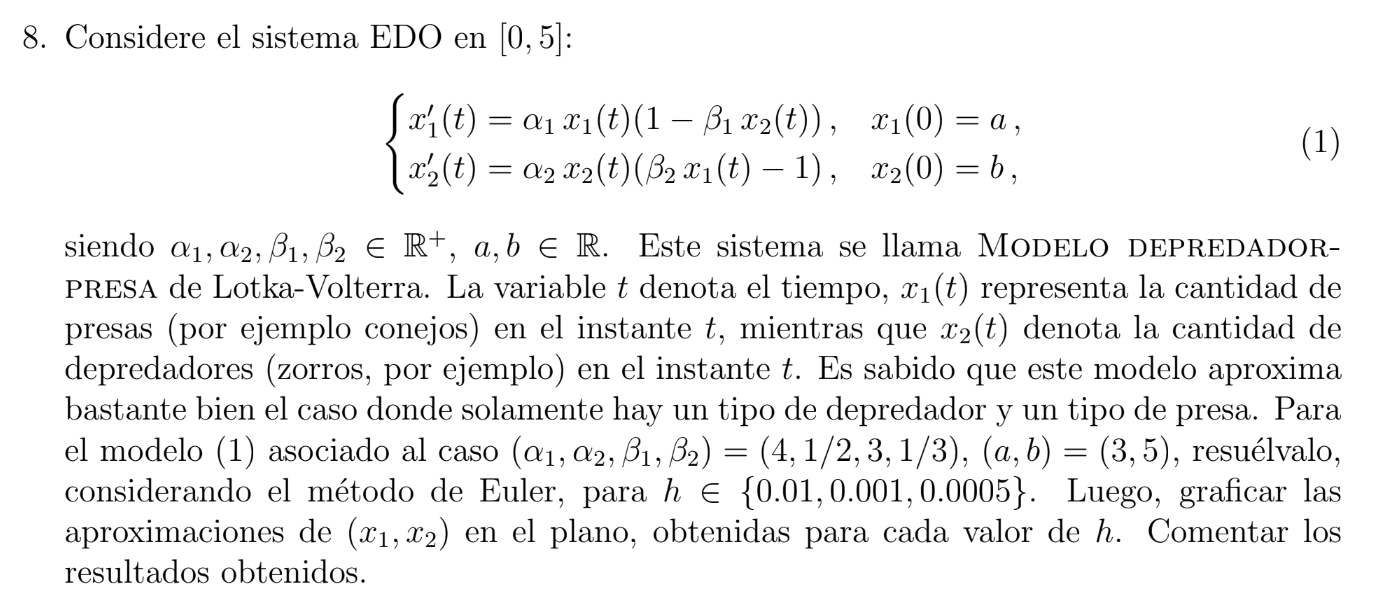

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
alpha_1, alpha_2 = 4, 0.5
beta_1, beta_2 = 3, 1 / 3
a, b = 3, 5
t0, tf = 0, 5
h_values = [0.01, 0.001, 0.0005]

In [7]:
def lotka_volterra(t, x1, x2):
    dx1_dt = alpha_1 * x1 * (1 - beta_1 * x2)
    dx2_dt = alpha_2 * x2 * (beta_2 * x1 - 1)
    return dx1_dt, dx2_dt

In [47]:
def approximate_with_method(method, h, t0=t0, tf=tf, x1_0=a, x2_0=b):
    t_values = np.arange(t0, tf + h, h)
    x1_values = np.zeros_like(t_values)
    x1_values[0] = x1_0

    x2_values = np.zeros_like(t_values)
    x2_values[0] = x2_0

    for j in range(len(t_values) - 1):
        dx1, dx2 = lotka_volterra(t_values[j], x1_values[j], x2_values[j])
        x1_values[j + 1] = method(
            yj=x1_values[j], h=h, dy=dx1, t=t_values[j], dy_dt=lotka_volterra
        )
        x2_values[j + 1] = method(
            yj=x2_values[j], h=h, dy=dx2, t=t_values[j], dy_dt=lotka_volterra
        )
    return t_values, x1_values, x2_values

def plot_approximation_results(method, h_values):
    # Create the figure and axes

    markers = ["o", "s", "^", "x", "d", "*", "p", "h", "+", "|"]

    # Plot numerical solutions for each h
    for i, h in enumerate(h_values):
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        fig.suptitle(f"h = {h}", fontsize="xx-large")
        t_values, x1_aprox, x2_aprox = approximate_with_method(method, h)
        axes[0].plot(
            t_values,
            x1_aprox,
            label="Presa",
            marker=markers[i % len(markers)],  # Cycle through markers if more h_values
            linestyle="",
            markersize="3",
            color='r'
        )
        axes[0].plot(
            t_values,
            x2_aprox,
            label="Depredador",
            marker=markers[i % len(markers) + 1],
            linestyle="",
            markersize="3",
        )
        axes[1].plot(t_values, x1_aprox, label="Presa", color='r')
        axes[1].plot(t_values, x2_aprox, label="Depredador")

    # Apply consistent formatting to all subplots
        for ax in axes:
            ax.set_xlabel("time (t)")
            ax.set_ylabel("y(t)")
            ax.legend()
            ax.grid()

    plt.show()


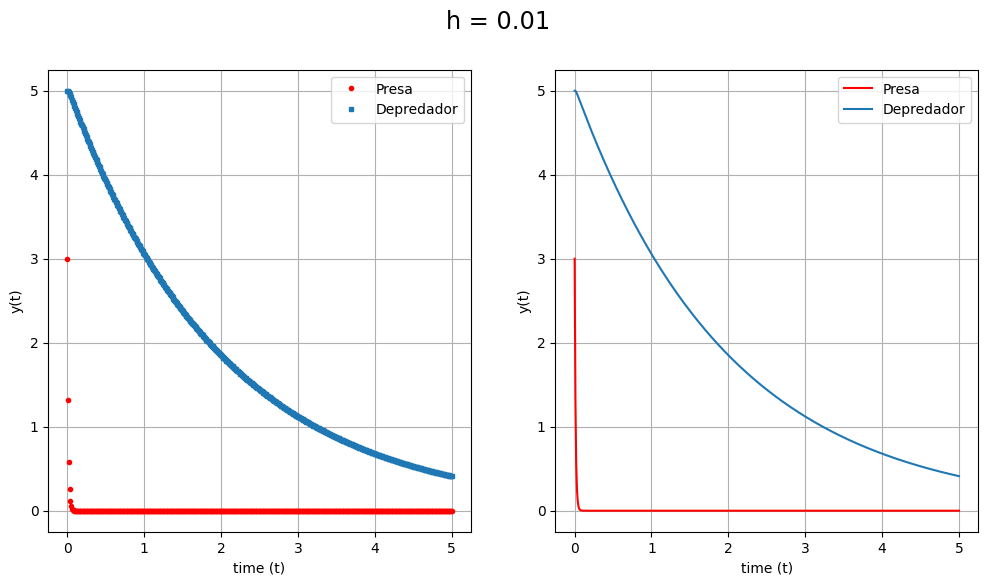

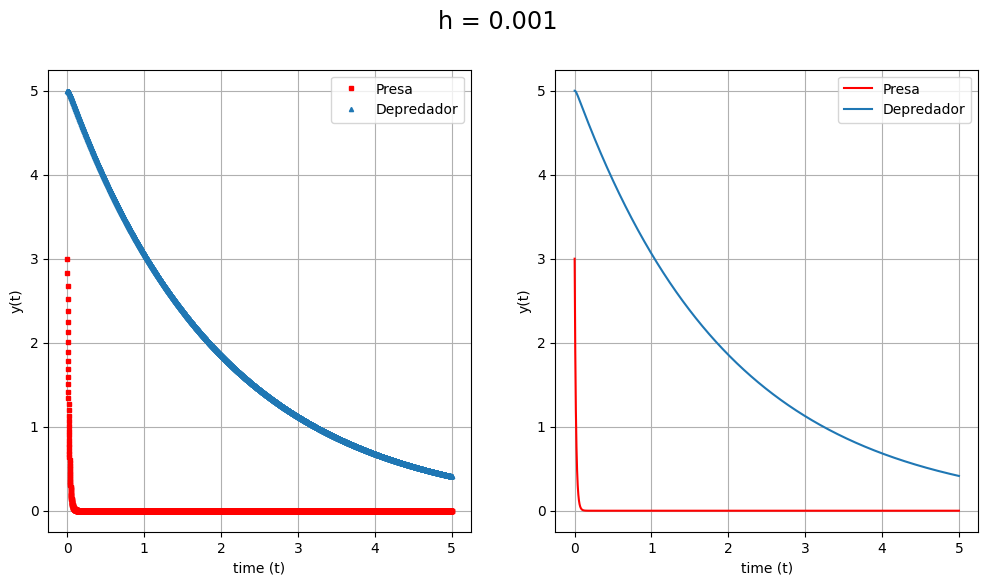

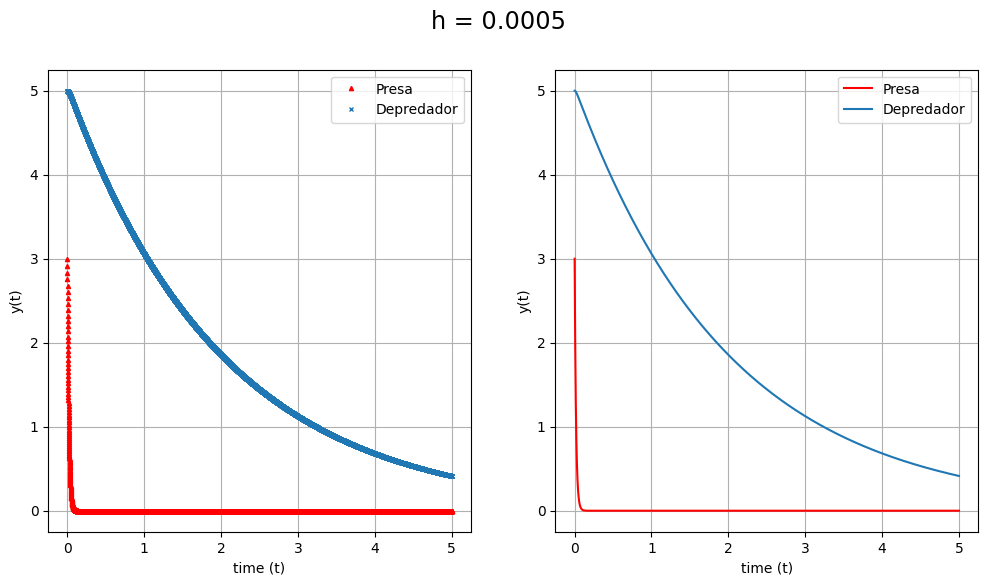

In [48]:
def euler(yj, h, dy, **kwargs):
    return yj + h * dy

plot_approximation_results(
    method=euler,
    h_values=h_values,
)

## Some coments

The first thing we notice can notice that preys die off very quickly, and the remaining predators don't last long either, exhibiting the expected prey-predator behaviour expected.

Now, regarding the numerical approximation, even though the number of steps between 0.01 and 0.0005 differs greatly, the method is precise enough to give a good approximation with fewer number of steps, making the difference barely noticeable.